<a href="https://colab.research.google.com/github/Supreme-YS/ML/blob/main/pre_processing_ml%5B03%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

학습목표
- 데이터 인코딩 -> 라벨인코딩, 원-핫-인코딩
- 정규화, 표준화 -> 피처 스케일링
- 결측치 처리 및 이상치 처리

In [1]:
# 데이터 인코딩 - 라벨 인코딩 : 문자열을 숫자로 변환하는 작업
# fit(), transform()
from sklearn.preprocessing import LabelEncoder

In [14]:
item_label = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)

print('encoder :', encoder)
print('encoder result : ', digit_label)
print('*'*50)

print('decoder result : ', encoder.inverse_transform(digit_label))
print('type', type(digit_label))

encoder : LabelEncoder()
encoder result :  [0 1 4 5 3 3 2 2]
**************************************************
decoder result :  ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']
type <class 'numpy.ndarray'>


In [9]:
# 데이터 인코딩 - One-hot Encoding : 고유값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

In [20]:
item_label = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)

print('type', type(digit_label))

# 2차원 데이터 변환
digit_label = digit_label.reshape(-1,1)
print( digit_label.shape , digit_label)

# one-hot 인코딩
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_label = one_hot_encoder.transform(digit_label)

print( one_hot_label.shape)
print( one_hot_label.toarray())


type <class 'numpy.ndarray'>
(8, 1) [[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
(8, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [23]:
# 판다스 원핫인코딩
labelDF = pd.DataFrame({'item' : ['TV', '냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})

pd.get_dummies(labelDF)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [25]:
# 결측치 처리
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [28]:
# isnull(), isna() 

df.isnull()
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

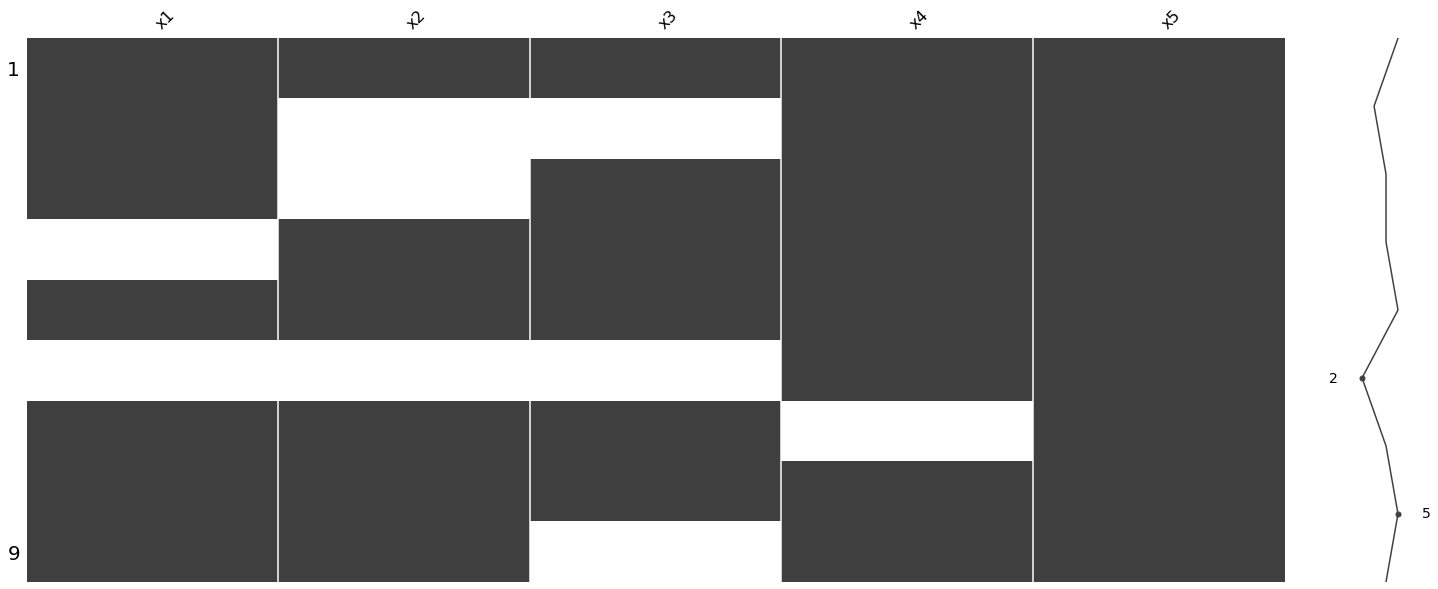

In [31]:
# conda install -c conda-forge/label/cf202003 missingno
# 결측치를 시각화 해 주는 패키지
# 결측 -흰색, 아닌 것 -검정색

import missingno as msno
msno.matrix(df)


In [32]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


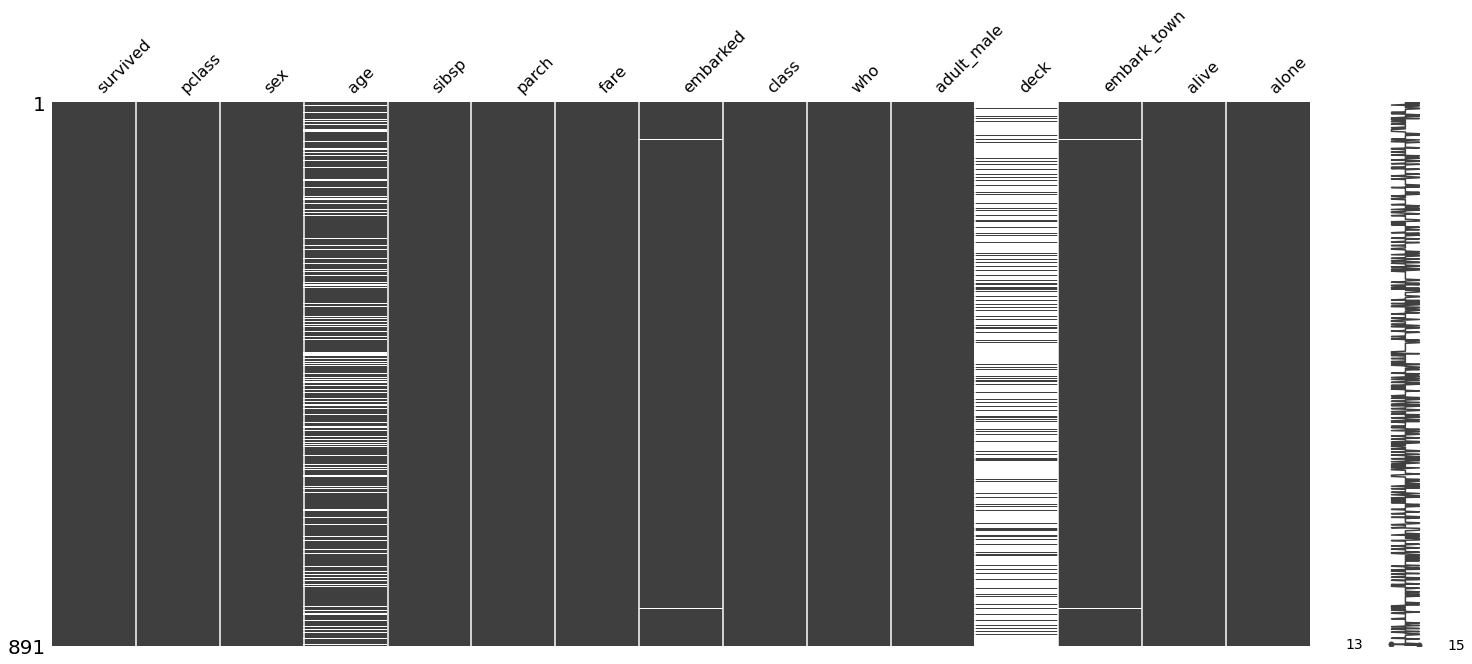

In [34]:
msno.matrix(titanic)

In [36]:
# 결측치를 처리하는 방법
# - dropna()


In [37]:
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B
7,8.0,0.8,8.0,2019-01-08,B


In [38]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [39]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [40]:
df.dropna(thresh=7, axis=1) # 비결측데이터의 갯수가 7개 

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-06,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


In [43]:
# 50 % 이상 비결측 데이터가 있으면 그대로 남기고 아니면 해당 열을 삭제한다.
titanic.dropna(thresh = int(len(titanic) * 0.5) , axis=1, inplace=True)
int(len(titanic) * 0.5)

445

In [ ]:
msno.matrix(titanic)

In [46]:
# sklearn - SimpleImputer

from sklearn.impute import SimpleImputer

In [47]:
imputer = SimpleImputer(strategy='most_frequent') # 최빈값으로 대체
df = pd.DataFrame(imputer.fit_transform(df), 
                  columns=df.columns)
df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


In [48]:
# titanic -> age 결측값을 중앙값으로 대체한다면?

age_imputer = SimpleImputer(strategy='median') 
titanic['age'] = age_imputer.fit_transform(titanic[['age']])

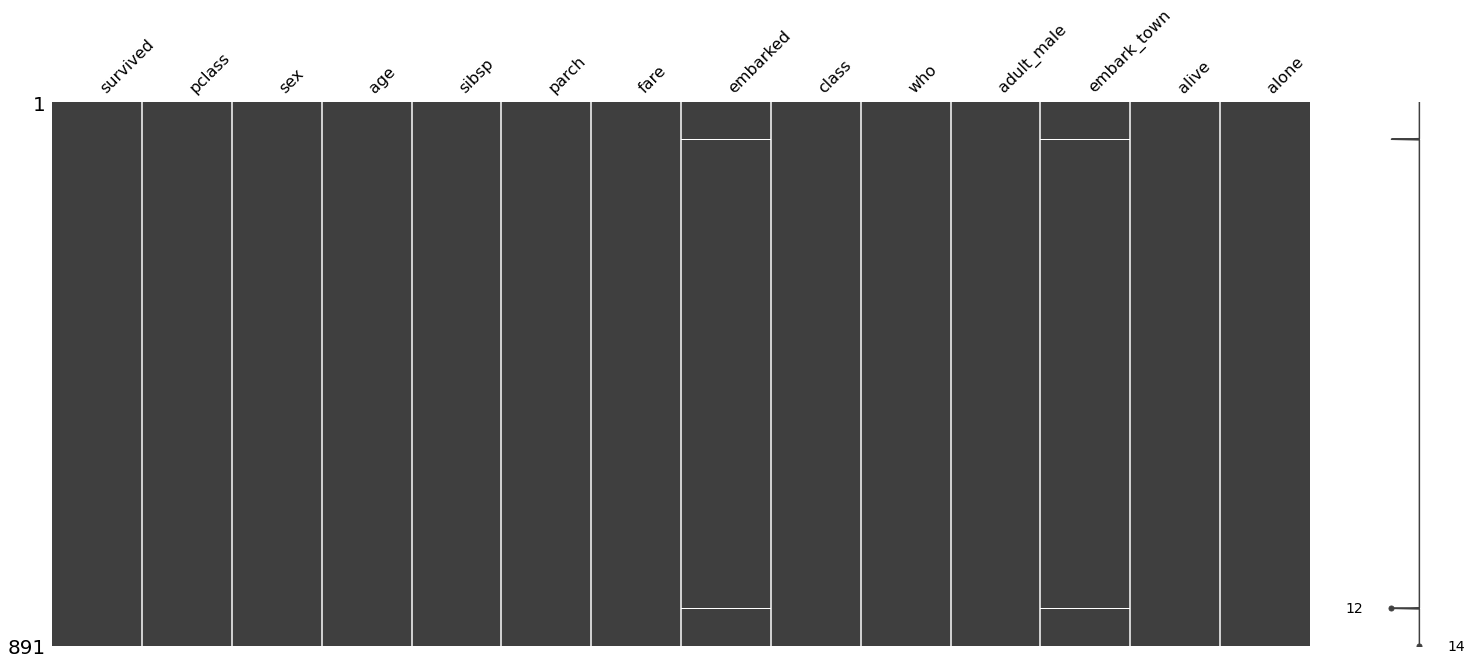

In [49]:
msno.matrix(titanic)

In [50]:
# feature scaling 
# 표준화(standardization) : 정규분포 ( 평균이 0 분산이 1 가우시안분포 변환)                   StandardScaler()
# 정규화(Normarlization)  : 모든 feature 0과 1사이의 값으로 변환(음수가 있으면 1로 변환)      MinMaxScaler()

In [51]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small
